<a href="https://colab.research.google.com/github/rafael1109-moura/Moda-MNIST/blob/main/Moda_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importações e divisão do conjunto

In [1]:
#instalação da biblioteca para termos acesso ao conjunto de dados

!pip install -U tensorflow_datasets

In [16]:
import tensorflow as tf

# o nosso cojunto de dados
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



In [17]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [18]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [19]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


#trabalhando com os dados

In [20]:
#iremos fazer uma normalização dos dados, convertendo cada valor de pixel para o tipo float, em seguida para um número entre 0 e 1

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

<function matplotlib.pyplot.show(close=None, block=None)>

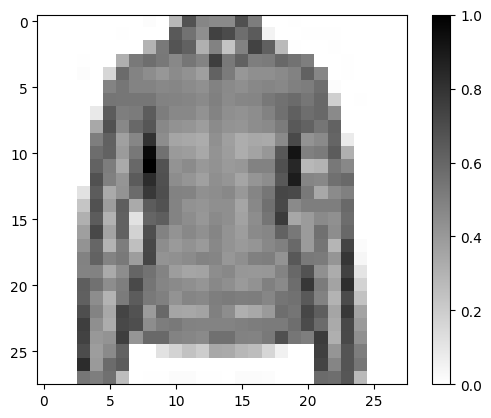

In [21]:
#plotando uma imagem para ver como ficou

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show

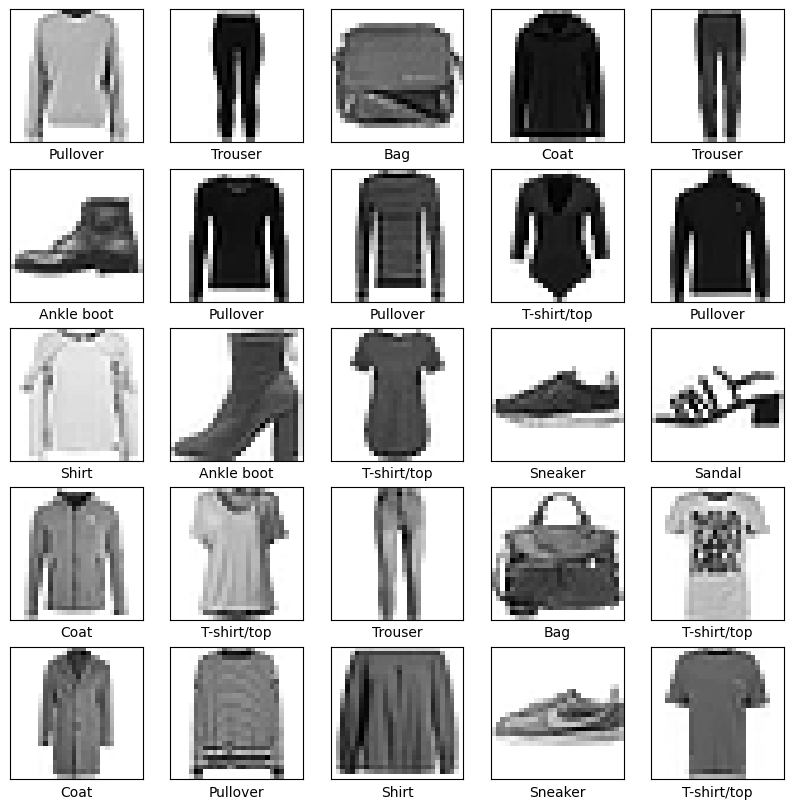

In [22]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

#construindo o modelo

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #transformamos em uma única matriz unidimensional
    tf.keras.layers.Dense(128, activation=tf.nn.relu), #primeira camada, relu por que não é linear
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #softmax para criar a distribuição da probabilidade
])




In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
BATCH_SIZE = 32 #lotes de 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE) # shuffle deixa os exemplos aleatorios
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7828 - loss: 0.6311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8649 - loss: 0.3756
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8799 - loss: 0.3295
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8883 - loss: 0.2993


In [32]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8781 - loss: 0.3358
Accuracy on test dataset: 0.8759999871253967


In [34]:
!git init
!git remote add origin https://github.com/rafael1109-moura/Moda-MNIST.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
